In [23]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble as ens
from sklearn import metrics as met
from sklearn import linear_model as lin
from sklearn import svm

from scipy import spatial as sp

%matplotlib inline  

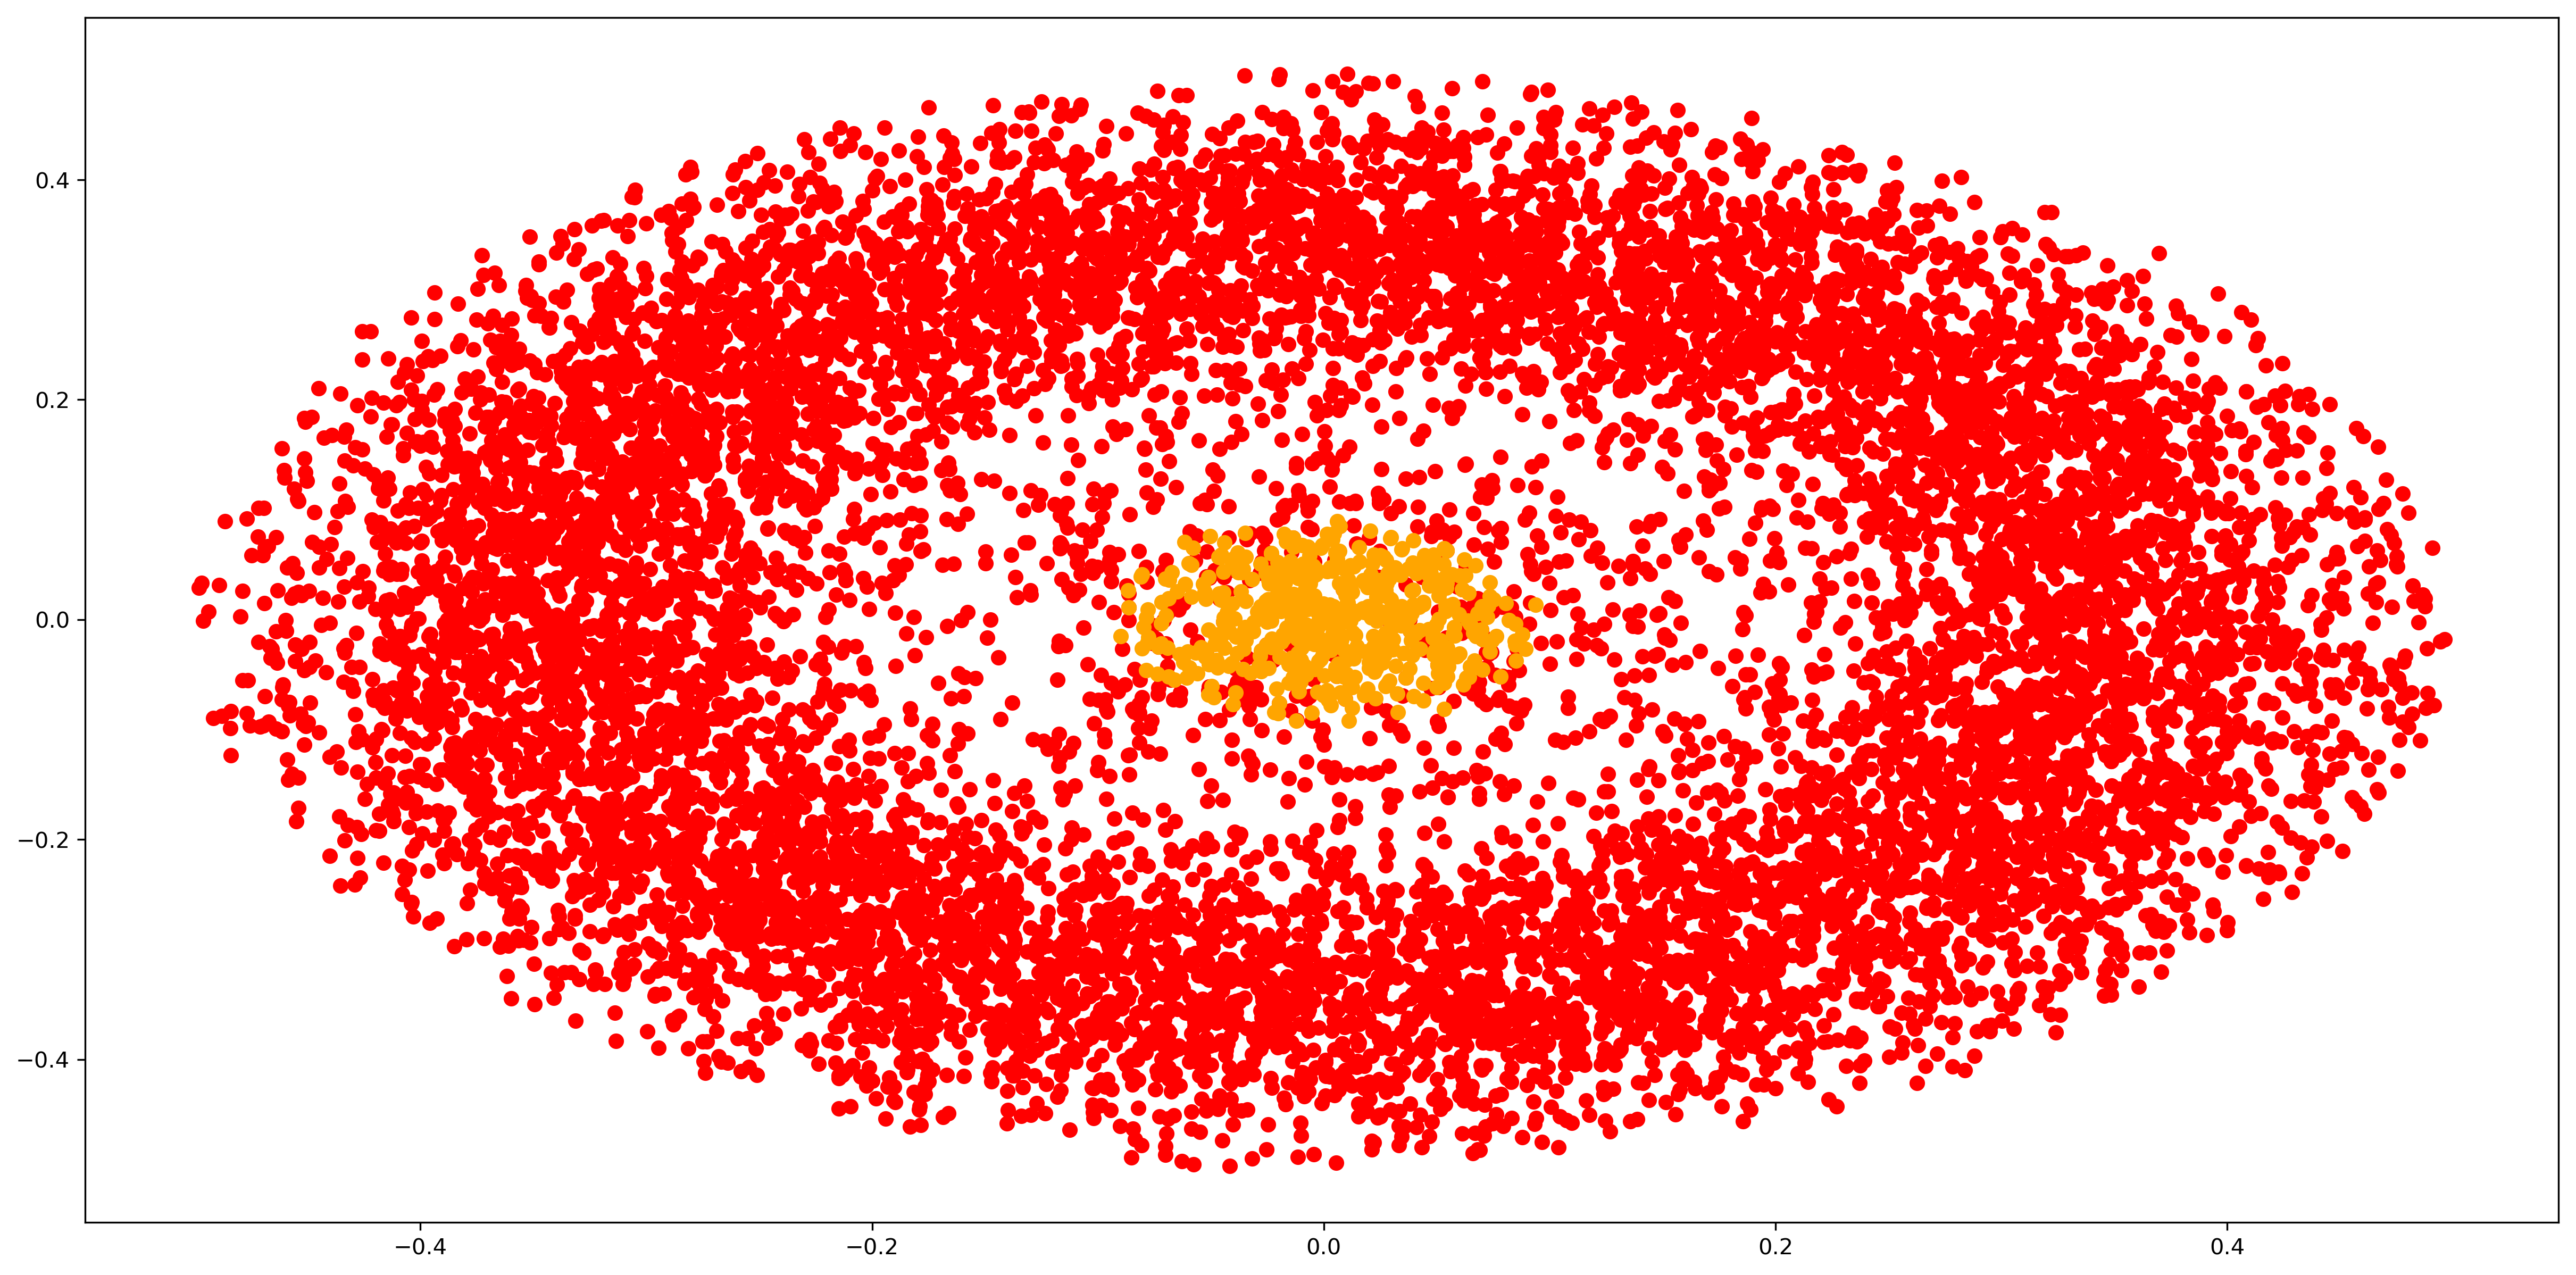

In [9]:
data = np.genfromtxt('ring.csv',delimiter=',')

plt.figure(figsize=(20,10),dpi=300)

plt.scatter(data[data[:,2]==0][:,0],data[data[:,2]==0][:,1],color='red')
plt.scatter(data[data[:,2]==1][:,0],data[data[:,2]==1][:,1],color='orange')

In [10]:
len(data)

12500

In [11]:
tr_size=1000

idx = np.random.permutation(len(data))

train = data[idx[:tr_size]]
test = data[idx[tr_size:]]

In [13]:
cf = lin.LogisticRegression()
cf.fit(train[:,:2],train[:,2])
pred = cf.decision_function(test[:,:2])
pred_cla = cf.predict(test[:,:2])
auc = met.roc_auc_score(test[:,2],pred)
acc = met.accuracy_score(y_true=test[:,2],y_pred=pred_cla)
print("auc: %f acc: %f"%(auc,acc))

auc: 0.500907 acc: 0.960000


In [14]:
cf = svm.LinearSVC()
cf.fit(train[:,:2],train[:,2])
pred = cf.decision_function(test[:,:2])
pred_cla = cf.predict(test[:,:2])
auc = met.roc_auc_score(test[:,2],pred)
acc = met.accuracy_score(y_true=test[:,2],y_pred=pred_cla)
print("linear kernel auc: %f acc: %f"%(auc,acc))

auc: 0.500979 acc: 0.960000


In [15]:
cf = svm.SVC(kernel='poly',degree=2,cache_size=30000)
cf.fit(train[:,:2],train[:,2])
pred = cf.decision_function(test[:,:2])
pred_cla = cf.predict(test[:,:2])
auc = met.roc_auc_score(test[:,2],pred)
acc = met.accuracy_score(y_true=test[:,2],y_pred=pred_cla)
print("poly auc: %f acc: %f"%(auc,acc))

auc: 0.995707 acc: 0.960000


In [16]:
cf = svm.SVC(kernel='rbf',degree=2,cache_size=30000)
cf.fit(train[:,:2],train[:,2])
pred = cf.decision_function(test[:,:2])
pred_cla = cf.predict(test[:,:2])
auc = met.roc_auc_score(test[:,2],pred)
acc = met.accuracy_score(y_true=test[:,2],y_pred=pred_cla)
print("rbf auc: %f acc: %f"%(auc,acc))

auc: 0.995646 acc: 0.960000


In [52]:
# simple linear kernel
ker_tr = train[:,:2].dot(train[:,:2].T).astype(np.float32)
ker_te = test[:,:2].dot(train[:,:2].T).astype(np.float32)

cf = svm.SVC(kernel='precomputed',cache_size=30000)
cf.fit(ker_tr,train[:,2])
pred = cf.decision_function(ker_te)
pred_cla = cf.predict(ker_te)
auc = met.roc_auc_score(test[:,2],pred)
acc = met.accuracy_score(y_true=test[:,2],y_pred=pred_cla)
print("prec linear auc: %f acc: %f"%(auc,acc))

prec linear auc: 0.503946 acc: 0.960000


In [65]:
print(np.min(pred))


-1.0002397743083506

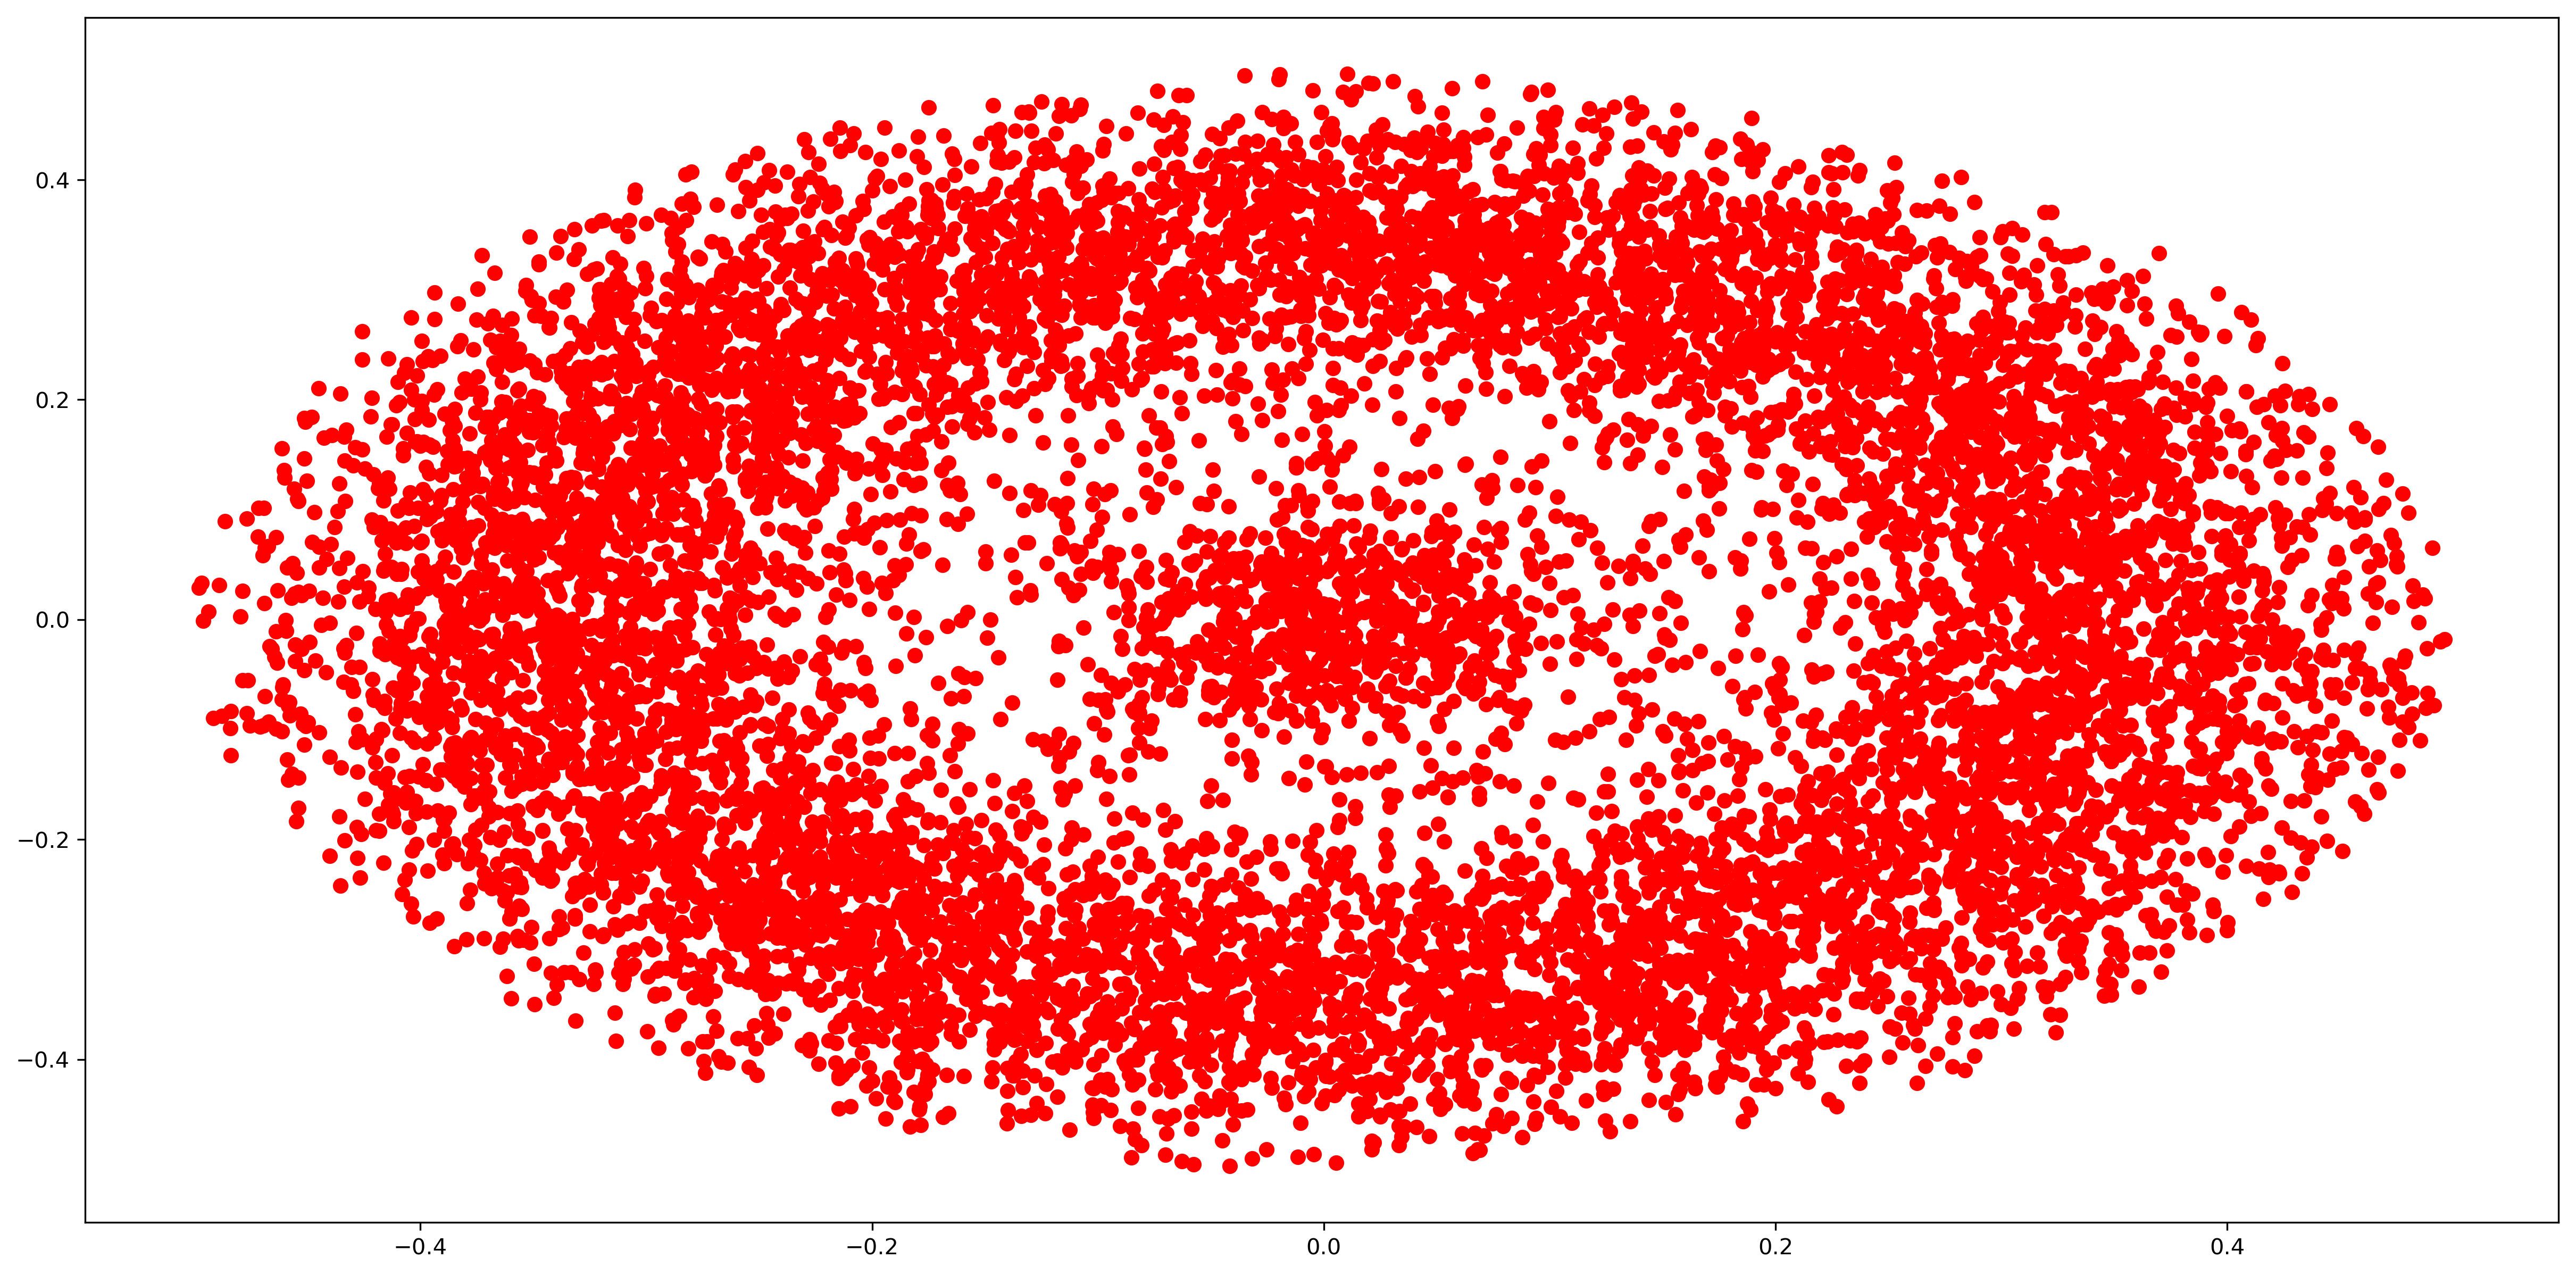

In [53]:
plt.figure(figsize=(20,10),dpi=300)

plt.scatter(test[pred_cla[:]==0][:,0],test[pred_cla[:]==0][:,1],color='red')
plt.scatter(test[pred_cla[:]==1][:,0],test[pred_cla[:]==1][:,1],color='orange')

plt.show()

(array([  5.,  12.,  16.,  13.,  31.,  36.,  38.,  48.,  65.,  69.,  90.,
        102., 128., 116., 144., 123., 168., 154., 166., 153., 150., 171.,
        157., 156., 148., 135., 135., 119., 147., 139., 144., 128., 114.,
        124., 101., 137., 115., 118., 118., 120., 137., 129., 131., 115.,
        141., 140., 168., 143., 149., 154., 157., 166., 157., 134., 132.,
        159., 118., 136., 144., 125., 103., 132., 112., 137., 124., 119.,
        117., 127., 130., 133., 113., 140., 116., 157., 143., 167., 158.,
        154., 158., 152., 145., 171., 175., 152., 131., 116., 101.,  96.,
         93.,  85.,  74.,  61.,  48.,  47.,  29.,  27.,  24.,  22.,  11.,
         12.]),
 array([-1.00023977, -1.00023537, -1.00023097, -1.00022657, -1.00022216,
        -1.00021776, -1.00021336, -1.00020895, -1.00020455, -1.00020015,
        -1.00019575, -1.00019134, -1.00018694, -1.00018254, -1.00017813,
        -1.00017373, -1.00016933, -1.00016492, -1.00016052, -1.00015612,
        -1.00015172, -1.00

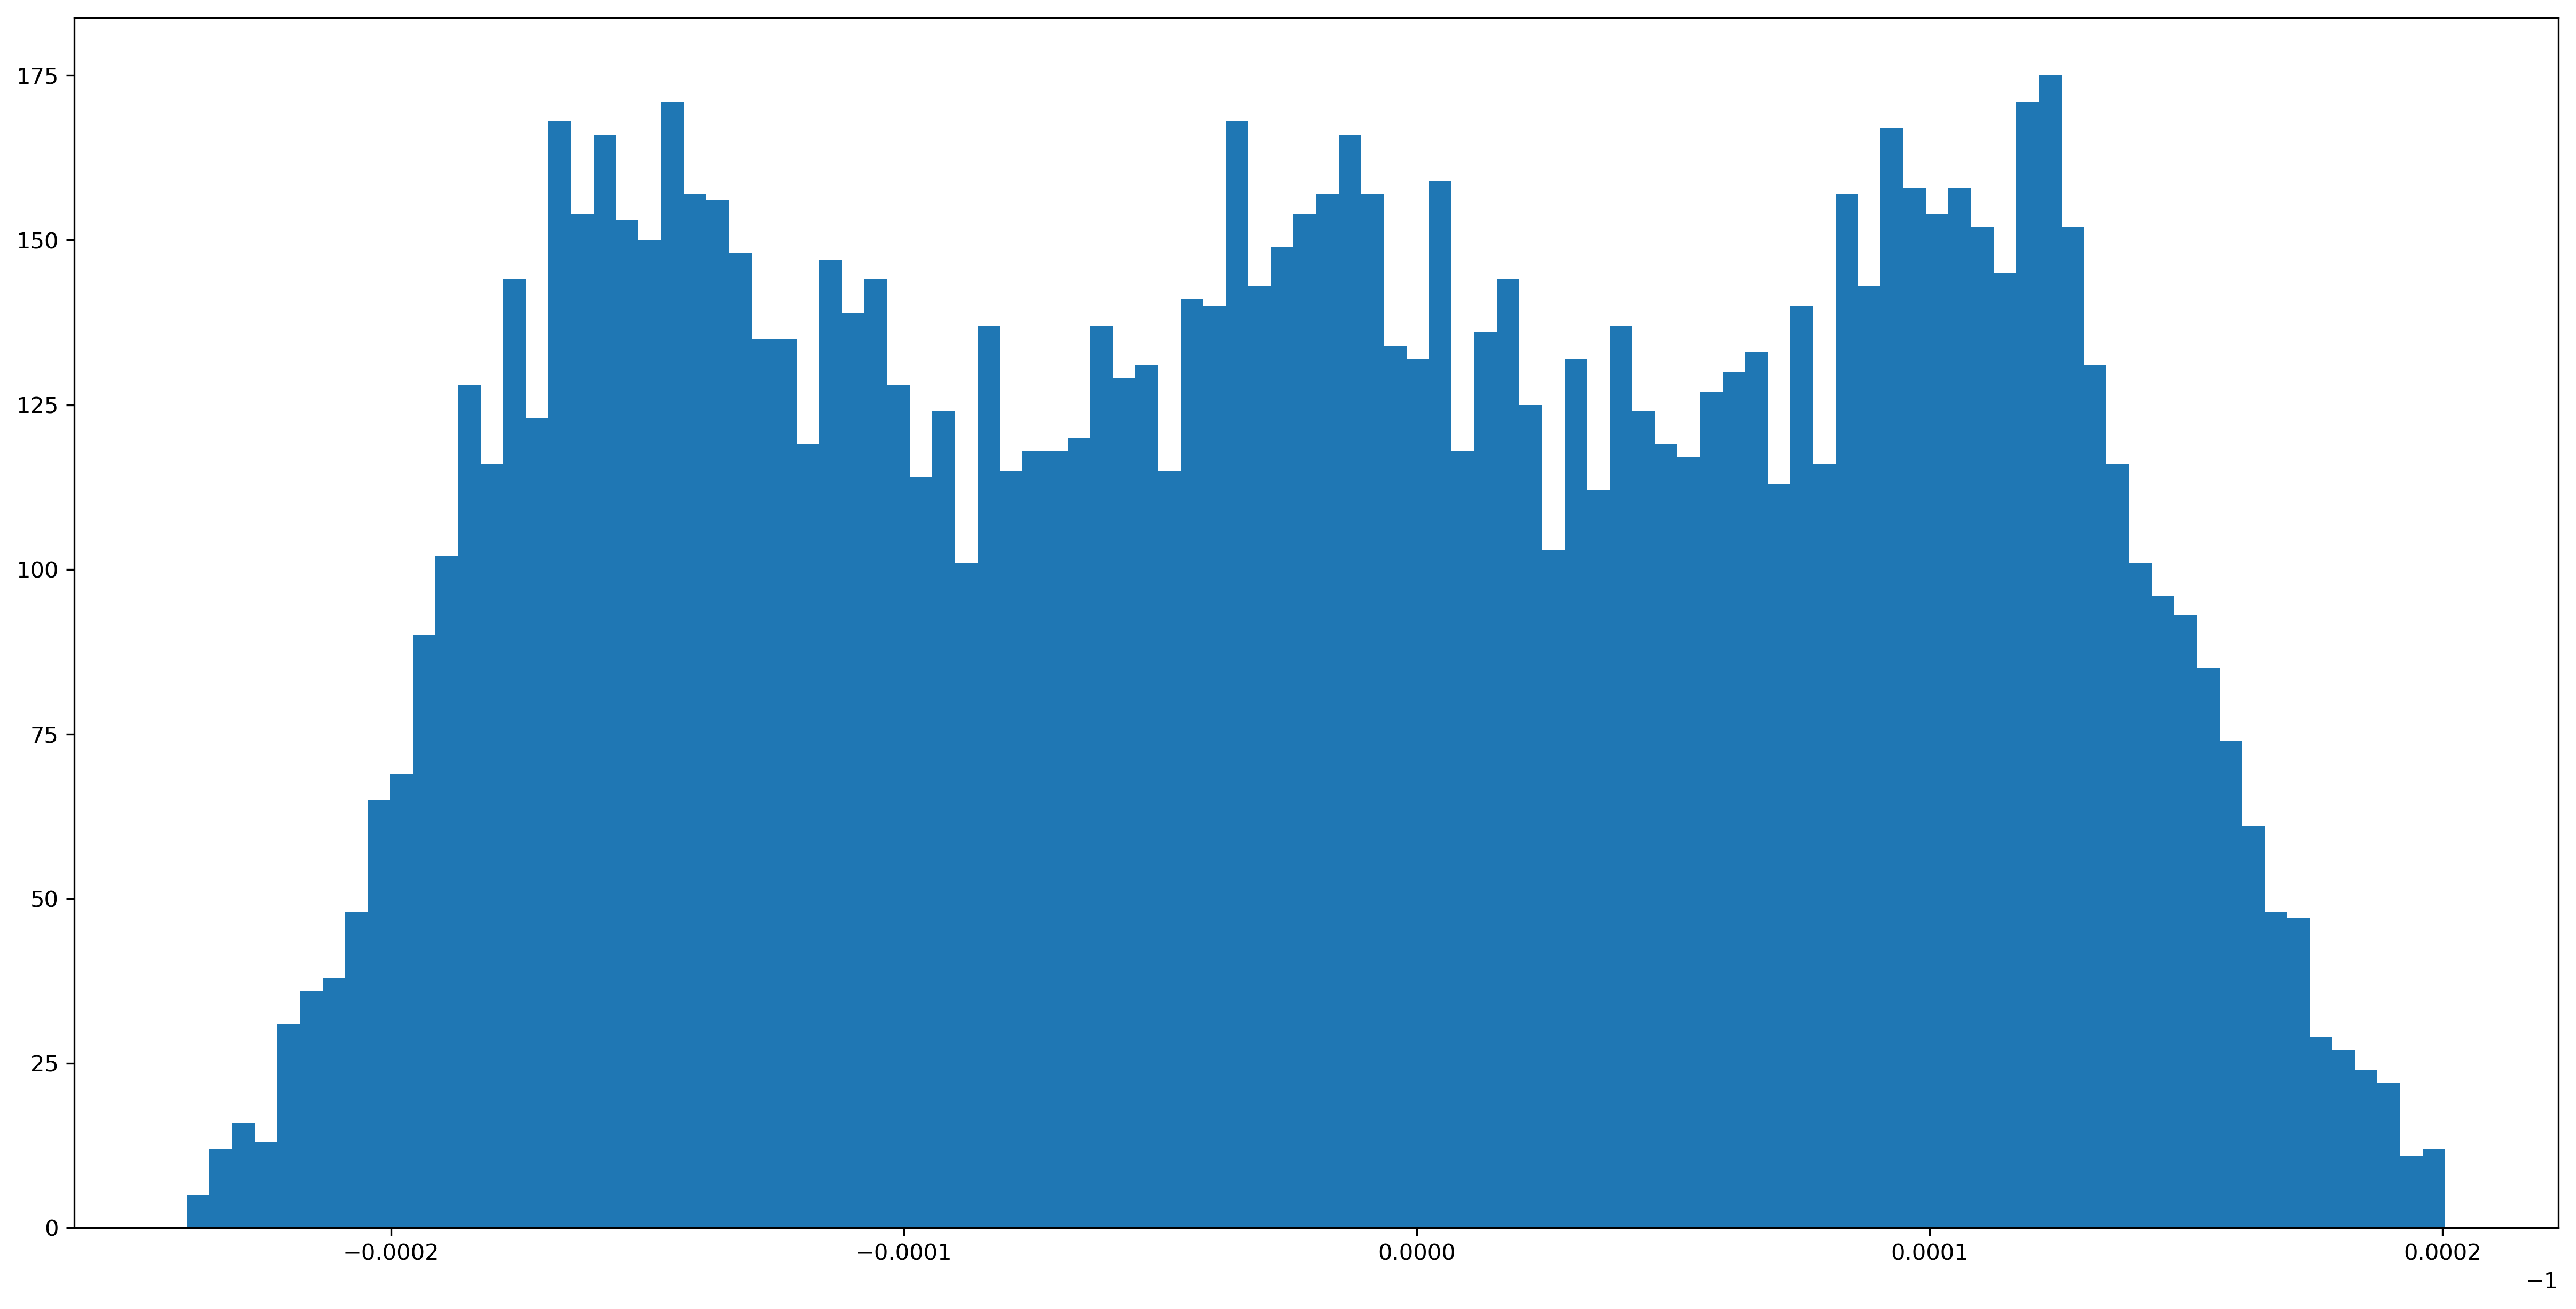

In [54]:
plt.figure(figsize=(20,10),dpi=300)

plt.hist(pred,bins=100)

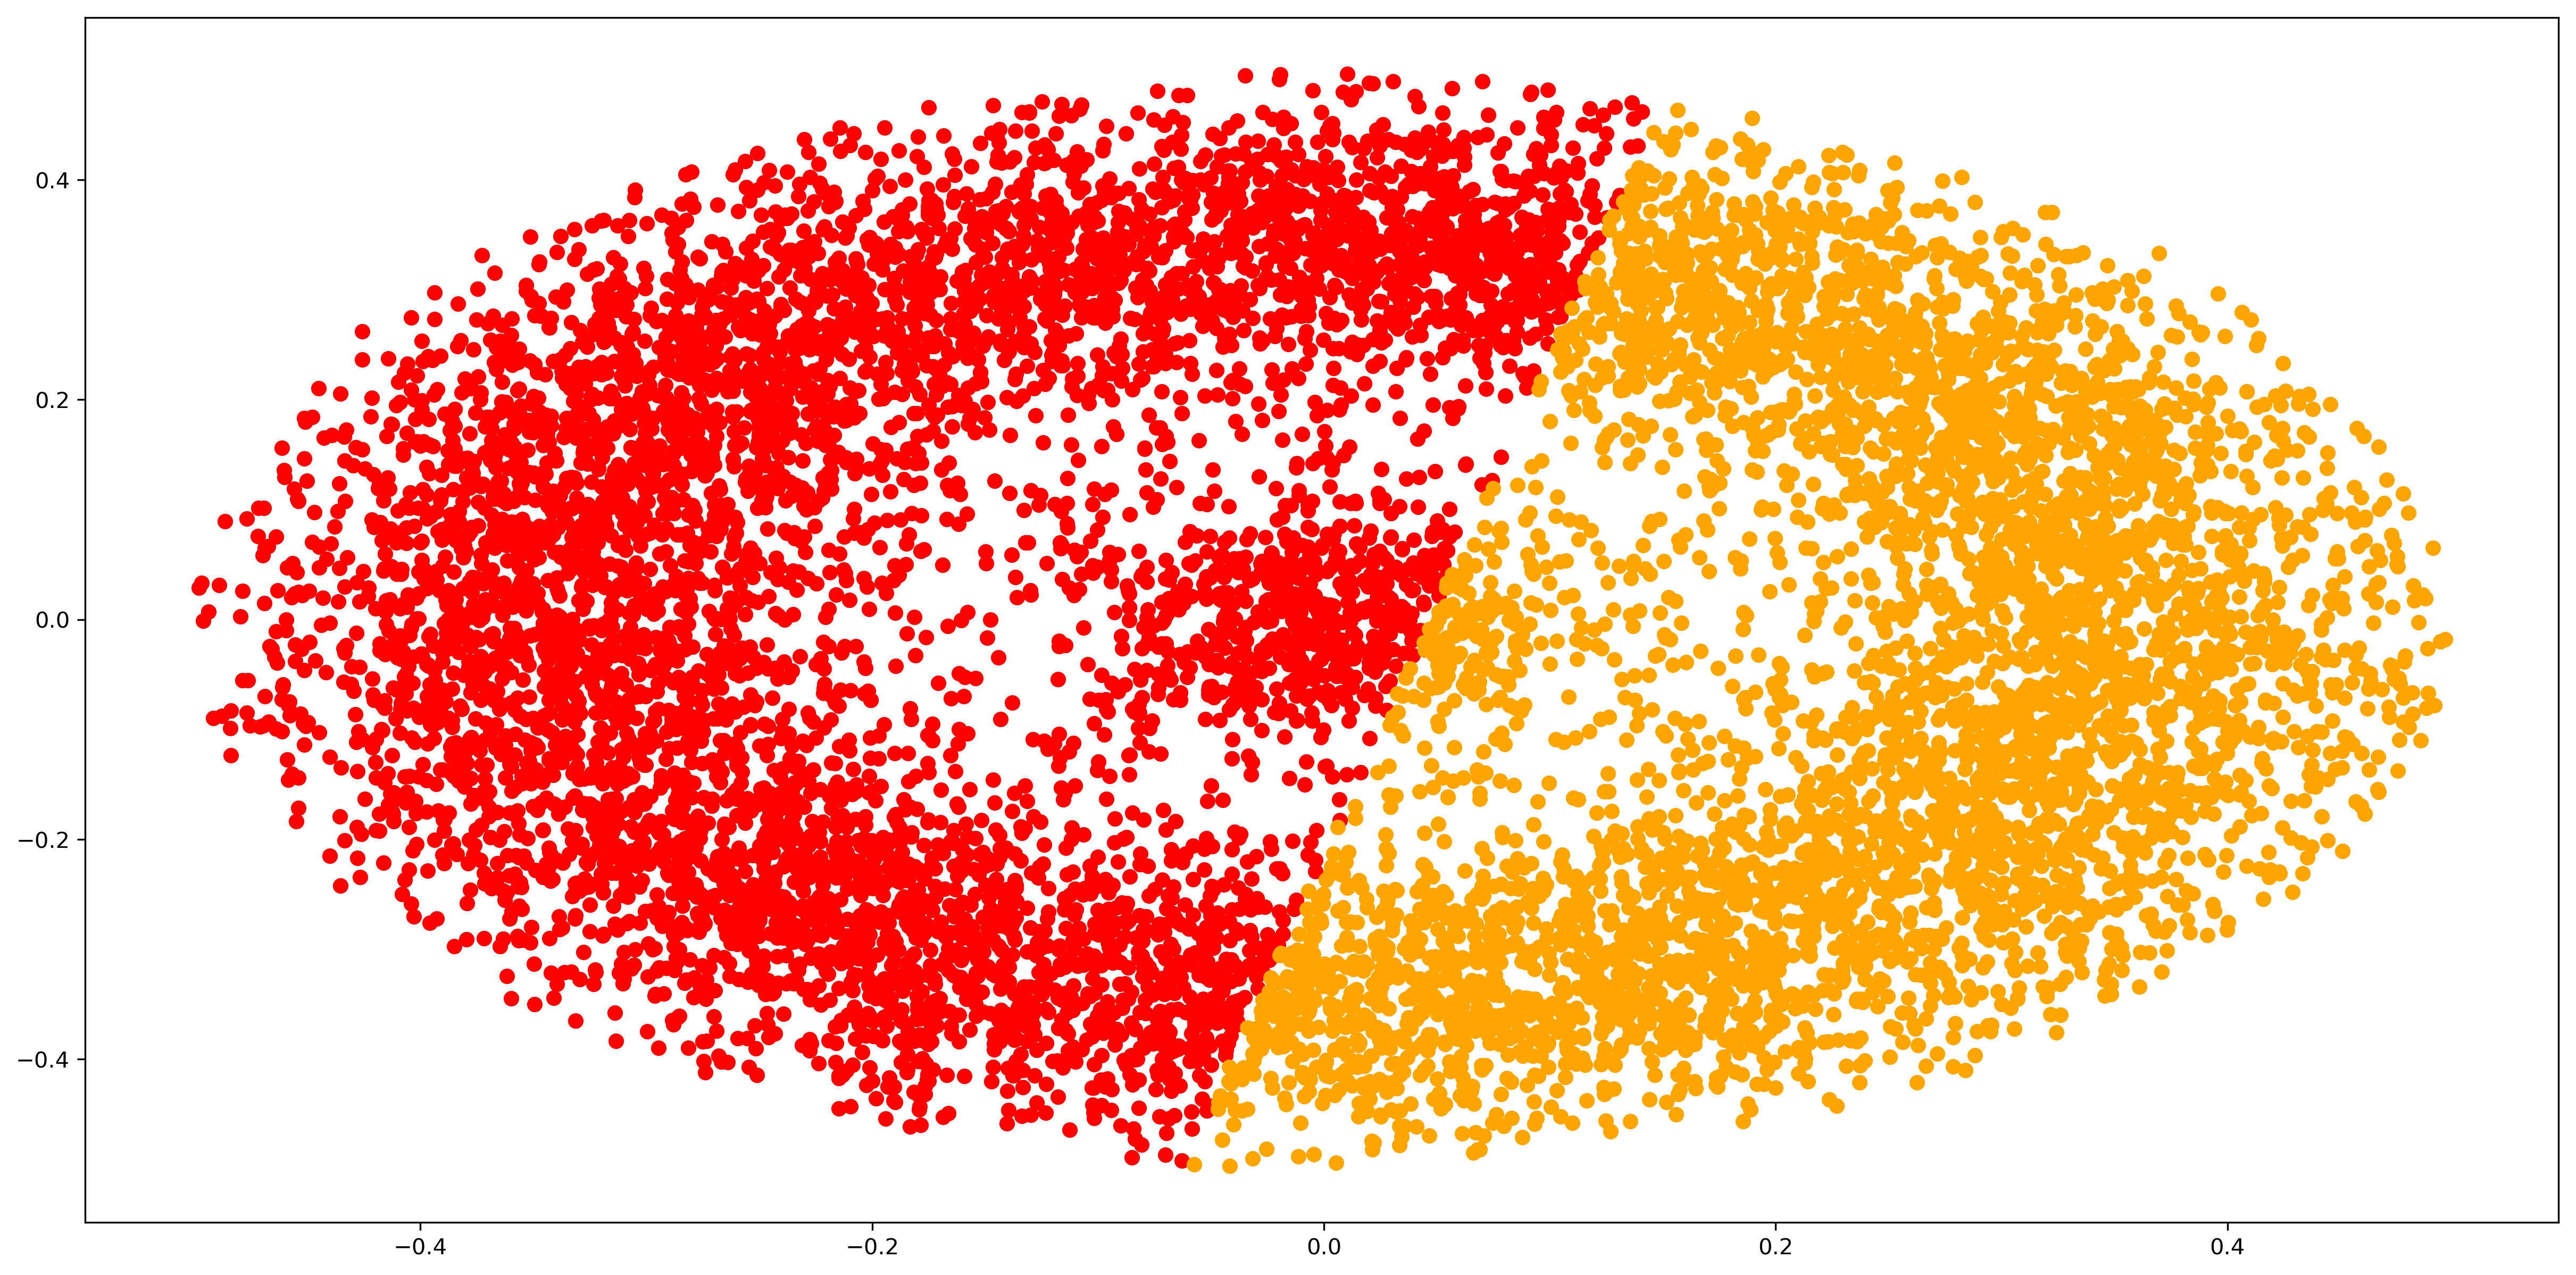

In [66]:
plt.figure(figsize=(20,10),dpi=300)

plt.scatter(test[pred[:]<-1.0][:,0],test[pred[:]<-1.0][:,1],color='red')
plt.scatter(test[pred[:]>=-1.0][:,0],test[pred[:]>=-1.0][:,1],color='orange')

plt.show()

In [ ]:
# simple linear kernel
ker_tr_raw = train[:,:2].dot(train[:,:2].T).astype(np.float32)
ker_te_raw = test[:,:2].dot(train[:,:2].T).astype(np.float32)

#make it rbf, note np.exp does not broadcast!!!
ker_tr = np.power(ker_tr_raw,2)
ker_te = np.power(ker_te_raw,2)

cf = svm.SVC(kernel='precomputed',cache_size=30000)
cf.fit(ker_tr,train[:,2])
pred = cf.decision_function(ker_te)
pred_cla = cf.predict(ker_te)
auc = met.roc_auc_score(test[:,2],pred)
acc = met.accuracy_score(y_true=test[:,2],y_pred=pred_cla)
print("prec poly auc: %f acc: %f"%(auc,acc))

In [41]:
def rbf_kernel(x_te,x_tr,gamma=1):
    return np.exp(-gamma*sp.distance.cdist(x_te,x_tr,metric='sqeuclidean')).astype(np.float16)

def dot_kernel(x_te,x_tr,gamma=1):
    return (gamma*x_te.dot(x_tr.T)).astype(np.float32)

def poly_kernel(x_te,x_tr,gamma=1,degree=2):
    return np.power((gamma*x_te.dot(x_tr.T)).astype(np.float32),degree)

def dot_rbf_kernel(x_te,x_tr,gamma=1):
    base = 2.0*gamma*(x_te.astype(np.float32)).dot(x_tr.T.astype(np.float32))
    for k in range(len(base[:,0])):
        base[k] -= gamma*(x_te[k].astype(np.float32)).dot(x_te[k].astype(np.float32))
    for k in range(len(base[0,:])):
        base[:,k] -= gamma*(x_tr[k].astype(np.float32)).dot(x_tr[k].astype(np.float32))
    #np.fill_diagonal(base,0.0)
    return np.exp(base) #.astype(np.float32)

# Why?
def dot_rbf_kernel_tr(x_tr,gamma=1):
    base = 2.0*gamma*(x_tr.astype(np.float32)).dot(x_tr.T.astype(np.float32))
    for k in range(len(base[:,0])):
        act = gamma*(x_tr[k].astype(np.float32)).dot(x_tr[k].astype(np.float32))
        base[k,:] -= act
        base[:,k] -= act
    np.fill_diagonal(base,0.0)
    return np.exp(base) #(0.5*(base+base.T)).astype(np.float32)

In [39]:
x_tr = train[:,:2]
x_te = test[:,:2]

ker_tr = rbf_kernel(x_te=x_tr,x_tr=x_tr)
ker_te = rbf_kernel(x_te=x_te,x_tr=x_tr)

cf = svm.SVC(kernel='precomputed',cache_size=30000)
cf.fit(ker_tr,train[:,2])
pred = cf.decision_function(ker_te)
pred_cla = cf.predict(ker_te)
auc = met.roc_auc_score(test[:,2],pred)
acc = met.accuracy_score(y_true=test[:,2],y_pred=pred_cla)
print("prec rbf auc: %f acc: %f"%(auc,acc))

prec rbf auc: 0.995078 acc: 0.960000


In [43]:
x_tr = train[:,:2]
x_te = test[:,:2]

ker_tr = dot_rbf_kernel_tr(x_tr=x_tr)
ker_te = dot_rbf_kernel(x_te=x_te,x_tr=x_tr)

cf = svm.SVC(kernel='precomputed',cache_size=30000)
cf.fit(ker_tr,train[:,2])
pred = cf.decision_function(ker_te)
pred_cla = cf.predict(ker_te)
auc = met.roc_auc_score(test[:,2],pred)
acc = met.accuracy_score(y_true=test[:,2],y_pred=pred_cla)
print("prec rbf auc: %f acc: %f"%(auc,acc))

prec rbf auc: 0.995702 acc: 0.960000


In [44]:
x_tr = train[:,:2]
x_te = test[:,:2]

ker_tr = poly_kernel(x_tr=x_tr,x_te=x_tr)
ker_te = poly_kernel(x_te=x_te,x_tr=x_tr)

cf = svm.SVC(kernel='precomputed',cache_size=30000)
cf.fit(ker_tr,train[:,2])
pred = cf.decision_function(ker_te)
pred_cla = cf.predict(ker_te)
auc = met.roc_auc_score(test[:,2],pred)
acc = met.accuracy_score(y_true=test[:,2],y_pred=pred_cla)
print("prec rbf auc: %f acc: %f"%(auc,acc))

prec rbf auc: 0.995772 acc: 0.960000


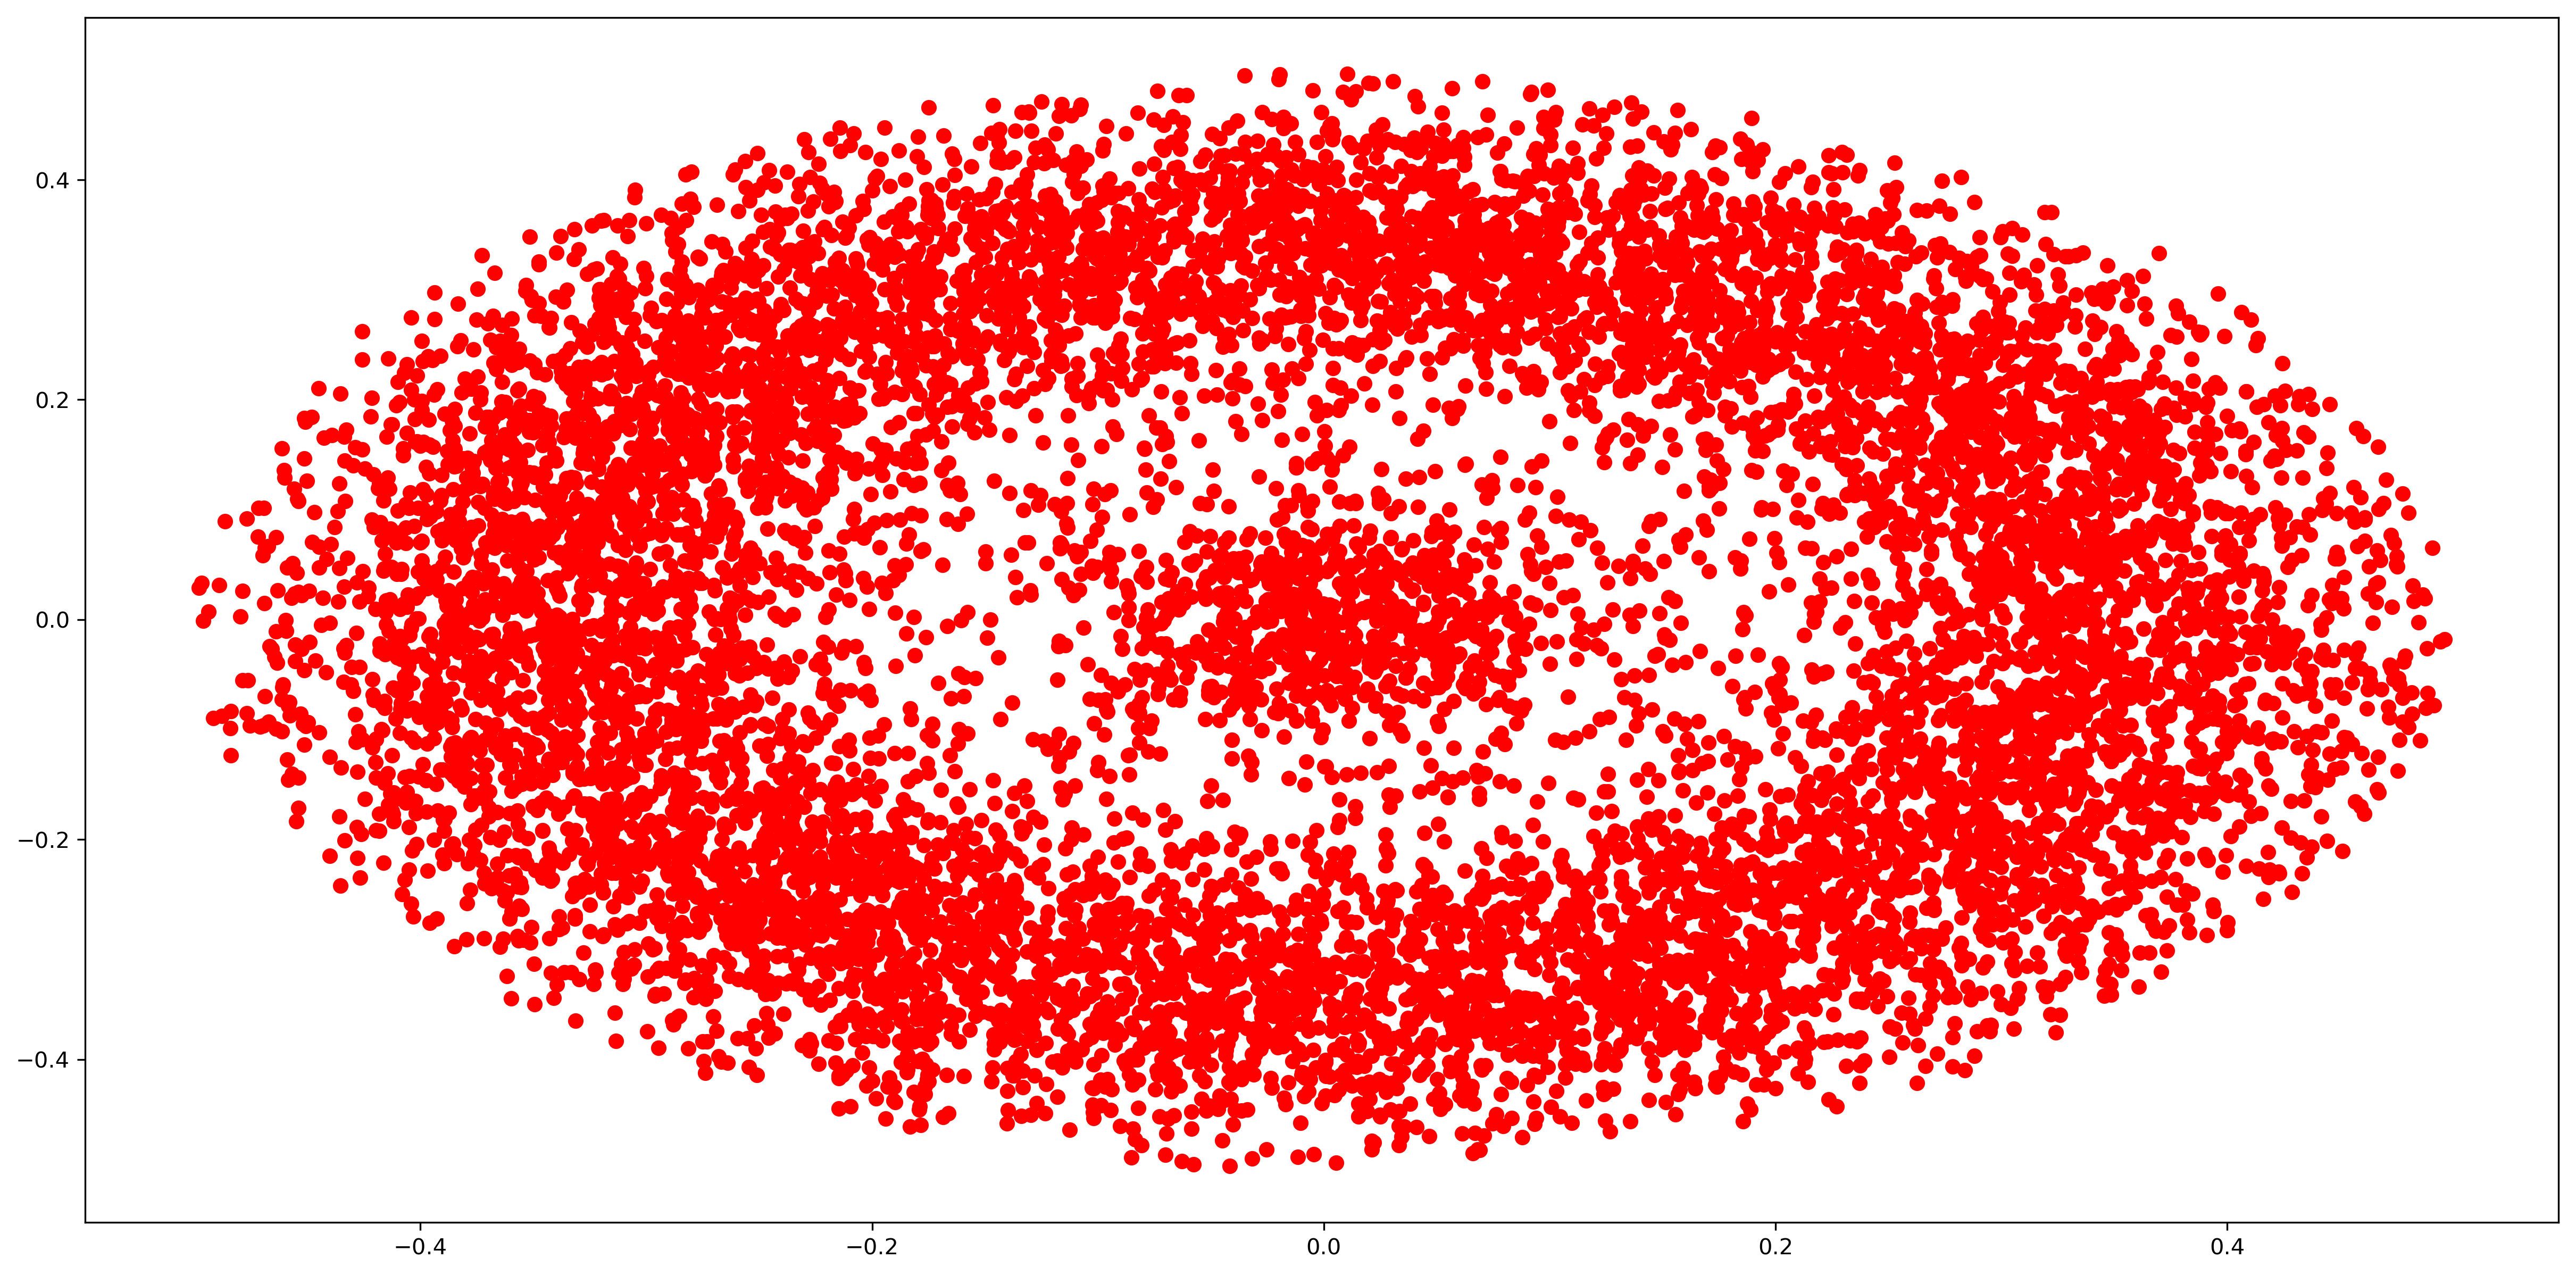

In [45]:
plt.figure(figsize=(20,10),dpi=300)

plt.scatter(test[pred_cla[:]==0][:,0],test[pred_cla[:]==0][:,1],color='red')
plt.scatter(test[pred_cla[:]==1][:,0],test[pred_cla[:]==1][:,1],color='orange')

plt.show()

(array([  3.,   3.,   4.,  11.,   7.,   8.,  15.,  12.,  12.,  20.,  13.,
         18.,  21.,  23.,  21.,  28.,  23.,  30.,  36.,  41.,  40.,  40.,
         60.,  51.,  53.,  56.,  65.,  55.,  79.,  97.,  80.,  96.,  87.,
        108.,  86., 123., 118., 123., 137., 136., 156., 159., 154., 167.,
        163., 186., 178., 195., 198., 206., 213., 228., 217., 231., 228.,
        226., 242., 212., 206., 237., 269., 271., 259., 259., 236., 266.,
        210., 230., 213., 227., 201., 180., 175., 174., 182., 150., 126.,
        136., 124., 110.,  71.,  66.,  60.,  60.,  59.,  57.,  43.,  46.,
         26.,  33.,  32.,  38.,  46.,  45.,  33.,  67.,  66., 133., 214.,
        266.]),
 array([-1.04809458, -1.04757436, -1.04705415, -1.04653393, -1.04601371,
        -1.0454935 , -1.04497328, -1.04445307, -1.04393285, -1.04341263,
        -1.04289242, -1.0423722 , -1.04185199, -1.04133177, -1.04081155,
        -1.04029134, -1.03977112, -1.03925091, -1.03873069, -1.03821047,
        -1.03769026, -1.03

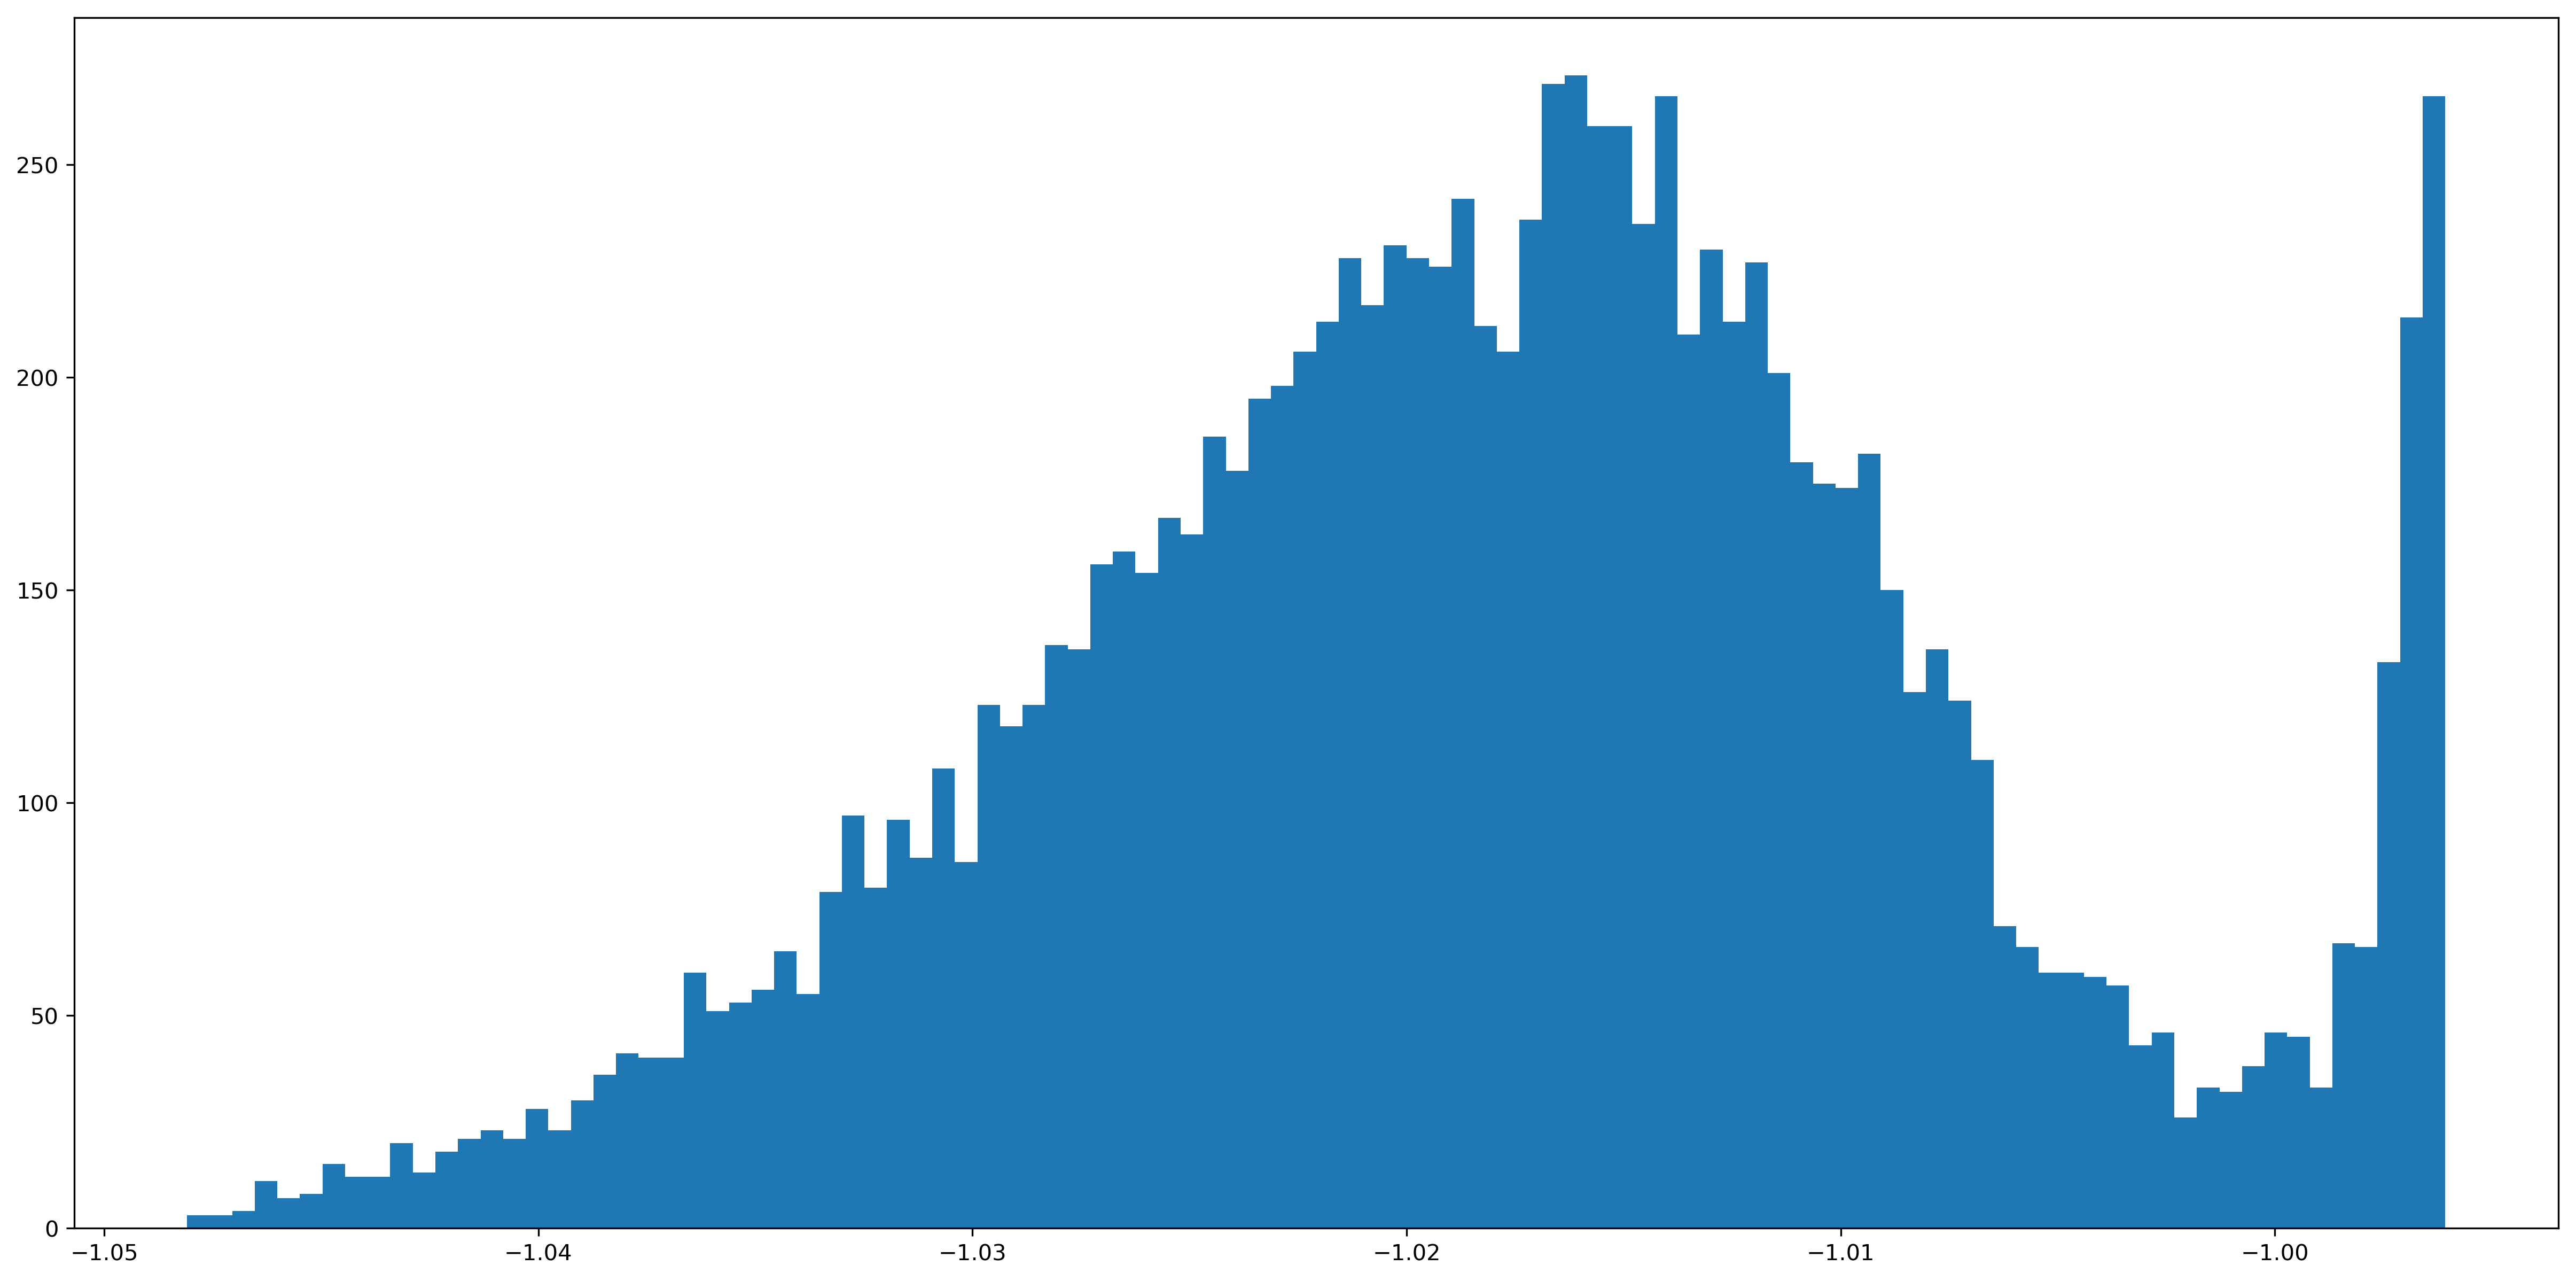

In [49]:
plt.figure(figsize=(20,10),dpi=300)

plt.hist(pred,bins=100)

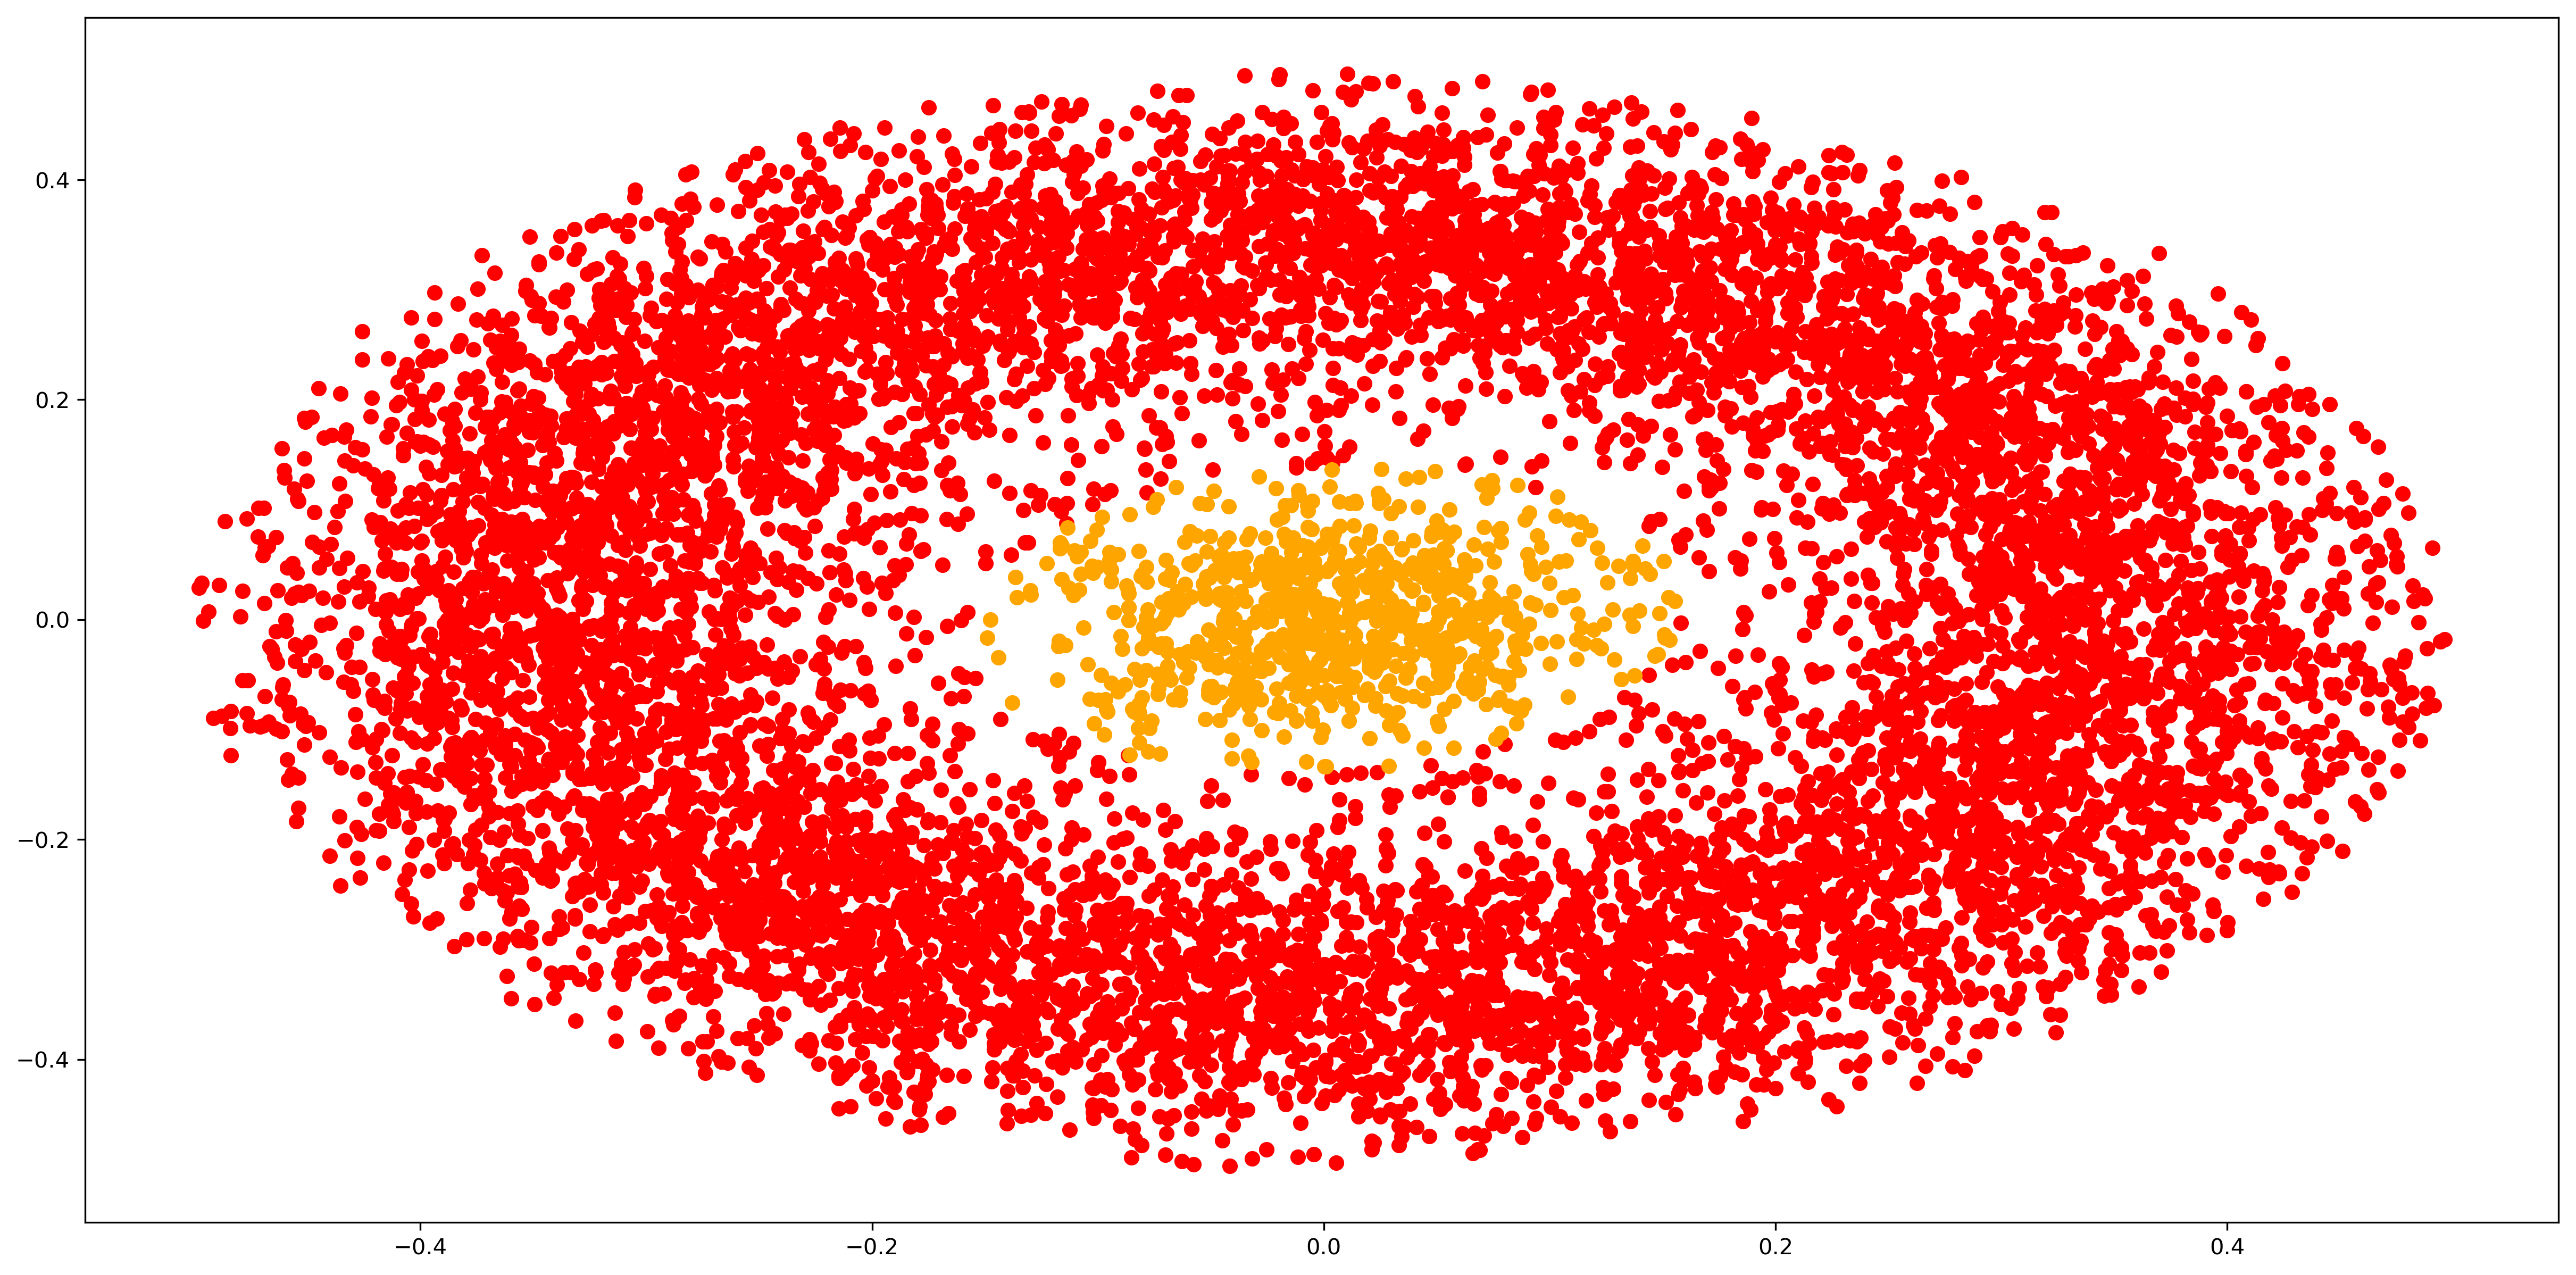

In [50]:
plt.figure(figsize=(20,10),dpi=300)

plt.scatter(test[pred[:]<-1.0][:,0],test[pred[:]<-1.0][:,1],color='red')
plt.scatter(test[pred[:]>=-1.0][:,0],test[pred[:]>=-1.0][:,1],color='orange')

plt.show()